# Get Activity Counts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import os
import glob
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
csv_file_paths = sorted(glob.glob('raw_data/*.csv'))  # Update the directory path as needed

# Initialize an empty list to store the loaded CSV data
dirty_data = pd.DataFrame()


# We are splitting our data by person so the first 10 people as train and the last 4 as test
# Iterate through each file in the directory
for filepath in sorted(csv_file_paths):
    # print(filepath)
    if filepath.endswith(".csv"):  # Check if the file is a CSV
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        df = df.dropna() # drop empty lines
        dirty_data = pd.concat([dirty_data, df])  
                  

In [3]:
# Reset the index
dirty_data = dirty_data.reset_index(drop=True)
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48909 entries, 0 to 48908
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48909 non-null  object 
 1   Actiwatch activity counts  48909 non-null  float64
 2   Actiware classification    48909 non-null  float64
 3   Apple Watch ENMO           48909 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [4]:
dirty_data

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
0,01/01/2000 01:20:45,0.0,1.0,0.007234
1,01/01/2000 01:21:00,24.0,1.0,0.030109
2,01/01/2000 01:21:15,3.0,1.0,0.008785
3,01/01/2000 01:21:30,0.0,1.0,0.007893
4,01/01/2000 01:21:45,3.0,1.0,0.007761
...,...,...,...,...
48904,28/01/2000 08:56:30,113.0,1.0,0.071673
48905,28/01/2000 08:56:45,79.0,1.0,0.072491
48906,28/01/2000 08:57:00,88.0,1.0,0.079414
48907,28/01/2000 08:57:15,73.0,1.0,0.093463


## Visualise. Data

Text(0.5, 1.0, 'Box Plot for Outlier Detection')

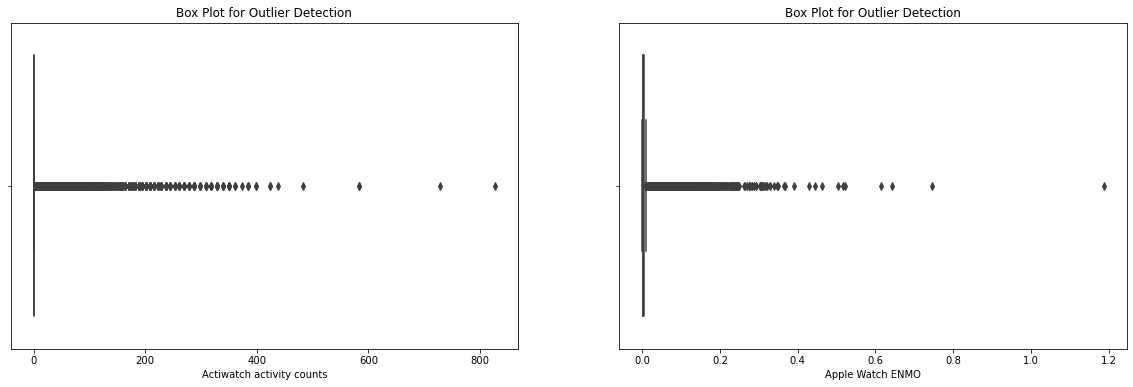

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
sns.boxplot(x='Actiwatch activity counts', data=dirty_data)
ax.set_title('Box Plot for Outlier Detection')

ax = fig.add_subplot(1, 2, 2)
sns.boxplot(x='Apple Watch ENMO', data=dirty_data)
ax.set_title('Box Plot for Outlier Detection')


Text(0, 0.5, 'Frequency')

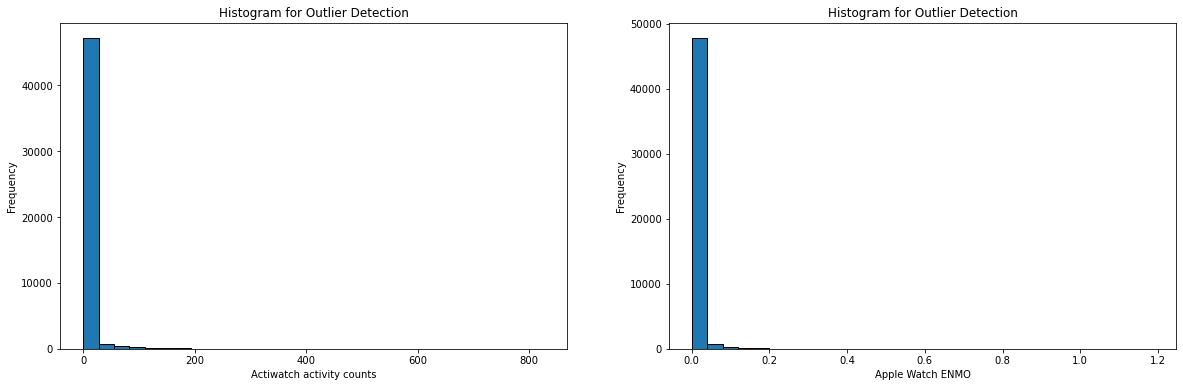

In [6]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.hist(dirty_data['Actiwatch activity counts'], bins=30, edgecolor='black')
ax.set_title('Histogram for Outlier Detection')
ax.set_xlabel('Actiwatch activity counts')
ax.set_ylabel('Frequency')

ax = fig.add_subplot(1, 2, 2)
ax.hist(dirty_data['Apple Watch ENMO'], bins=30, edgecolor='black')
ax.set_title('Histogram for Outlier Detection')
ax.set_xlabel('Apple Watch ENMO')
ax.set_ylabel('Frequency')

## Data Cleaning

In [7]:
# # Calculate Q1 and Q3 for the specific column
# Q1 = dirty_data['Actiwatch activity counts'].quantile(0.35)
# Q3 = dirty_data['Actiwatch activity counts'].quantile(0.75)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter outliers
# filtered_data = dirty_data[(dirty_data['Actiwatch activity counts'] >= lower_bound) & (dirty_data['Actiwatch activity counts'] <= upper_bound)]

In [8]:
# Calculate Q1 and Q3 for the specific column
Q1 = dirty_data['Apple Watch ENMO'].quantile(0.25)
Q3 = dirty_data['Apple Watch ENMO'].quantile(0.998)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = dirty_data.index[dirty_data['Apple Watch ENMO'] > upper_bound]

In [9]:
len(outliers)

7

In [10]:
# outliers = sorted(set(outliers))
dirty_data.drop(outliers, inplace=True)
dirty_data.reset_index(drop=True, inplace=True)
filtered_data = dirty_data

In [11]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48902 non-null  object 
 1   Actiwatch activity counts  48902 non-null  float64
 2   Actiware classification    48902 non-null  float64
 3   Apple Watch ENMO           48902 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


Text(0, 0.5, 'Frequency')

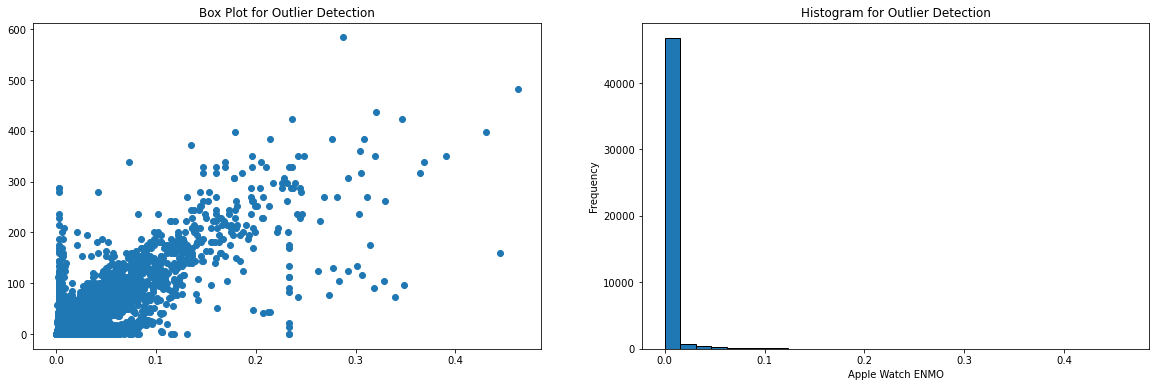

In [12]:
# Create a box plot
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
plt.scatter(filtered_data['Apple Watch ENMO'], filtered_data['Actiwatch activity counts'])
ax.set_title('Box Plot for Outlier Detection')

ax = fig.add_subplot(1, 2, 2)
ax.hist(filtered_data['Apple Watch ENMO'], bins=30, edgecolor='black')
ax.set_title('Histogram for Outlier Detection')
ax.set_xlabel('Apple Watch ENMO')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

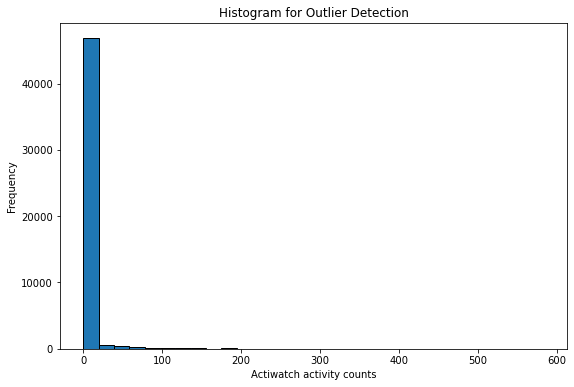

In [13]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.hist(filtered_data['Actiwatch activity counts'], bins=30, edgecolor='black')
ax.set_title('Histogram for Outlier Detection')
ax.set_xlabel('Actiwatch activity counts')
ax.set_ylabel('Frequency')

In [14]:
data = filtered_data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48902 non-null  object 
 1   Actiwatch activity counts  48902 non-null  float64
 2   Actiware classification    48902 non-null  float64
 3   Apple Watch ENMO           48902 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


### LInear Regression
#### Get Apple Watch Activity counts

In [16]:
# # Split the data into training and validation sets
# X_train = train['Apple Watch ENMO']  
# y_train = train['Actiwatch activity counts']

# X_val = val['Apple Watch ENMO']
# y_val = val['Actiwatch activity counts']

### Standardisation & Data Split

In [17]:
# Split the data into training and validation sets
X = data['Apple Watch ENMO'] 
y = data['Actiwatch activity counts']

# # Standardise Data
# x_mu = np.mean(X)
# x_sigma = np.std(X)

# y_mu = np.mean(y)
# y_sigma = np.std(y)

# X = (X - x_mu) / x_sigma;
# y = (y - y_mu) / y_sigma;

#Add Constant
X = sm.add_constant(X)

#Split The Data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=47)

#Split Data Alt
num_samples = data.shape[0]
training_samples = int(num_samples*0.7)
validation_samples = int(num_samples*0.15)
X_train = X.iloc[0:training_samples, :]
y_train = y.iloc[0:training_samples]
X_val = X.iloc[training_samples:(training_samples + validation_samples), :]
y_val = y.iloc[training_samples:(training_samples + validation_samples)]
X_test = X.iloc[(training_samples + validation_samples):, :]
y_test = y.iloc[(training_samples + validation_samples):]

In [18]:
print(X_train)

       const  Apple Watch ENMO
0        1.0          0.007234
1        1.0          0.030109
2        1.0          0.008785
3        1.0          0.007893
4        1.0          0.007761
...      ...               ...
34226    1.0          0.006140
34227    1.0          0.006128
34228    1.0          0.006074
34229    1.0          0.006137
34230    1.0          0.005772

[34231 rows x 2 columns]


# Simple Linear Regression

Text(0.5, 1.0, 'Value Disstribution Plot of Validation Data')

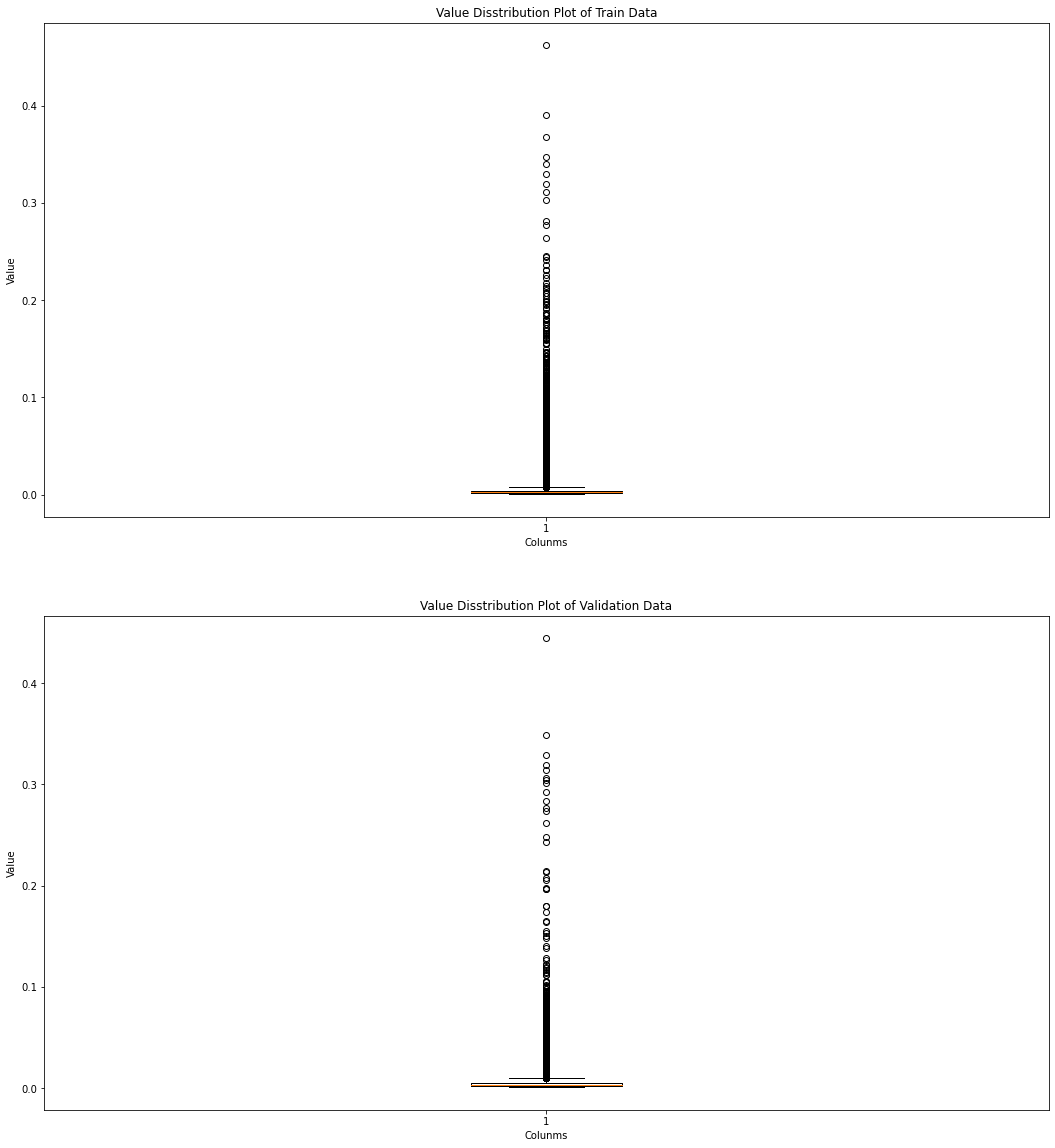

In [19]:
fig = plt.figure(figsize=[18, 20])
ax = fig.add_subplot(2, 1, 1)
ax.boxplot(X_train['Apple Watch ENMO']);
ax.set_xlabel('Colunms')
ax.set_ylabel('Value')
# ax.set_xticklabels([])
ax.set_title('Value Disstribution Plot of Train Data')

ax = fig.add_subplot(2, 1, 2)
ax.boxplot(X_val['Apple Watch ENMO']);
ax.set_xlabel('Colunms')
ax.set_ylabel('Value')
# ax.set_xticklabels([])
ax.set_title('Value Disstribution Plot of Validation Data')

### SLEEP WAKE VISUALISATION

In [20]:
X_train

,const,Apple Watch ENMO
0,1.0,0.007234
1,1.0,0.030109
2,1.0,0.008785
3,1.0,0.007893
4,1.0,0.007761
...,...,...
34226,1.0,0.006140
34227,1.0,0.006128
34228,1.0,0.006074
34229,1.0,0.006137


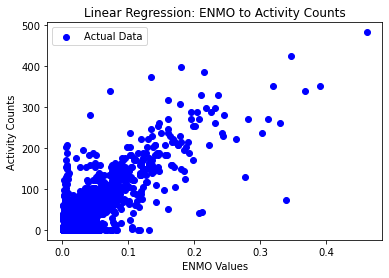

In [21]:
# Sample data (replace with your actual data)
enmo_values = np.array(X_train['Apple Watch ENMO'])  # Normalized ENMO values
activity_counts = y_train  # Corresponding activity counts

# Visualize the regression line
plt.scatter(enmo_values, activity_counts, color='blue', label='Actual Data')
# plt.plot(enmo_values, activity_counts, color='red', linewidth=2, label='Regression Line')
plt.xlabel('ENMO Values')
plt.ylabel('Activity Counts')
plt.legend()
plt.title('Linear Regression: ENMO to Activity Counts')
plt.show()

### Model Training (SLR)

In [22]:
model = sm.OLS(y_train, X_train).fit()
print(model.params)

const                 -2.949751
Apple Watch ENMO    1136.130126
dtype: float64


In [23]:
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Actiwatch activity counts   R-squared:                       0.749
Model:                                   OLS   Adj. R-squared:                  0.749
Method:                        Least Squares   F-statistic:                 1.021e+05
Date:                       Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                               19:34:06   Log-Likelihood:            -1.2320e+05
No. Observations:                      34231   AIC:                         2.464e+05
Df Residuals:                          34229   BIC:                         2.464e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

### Model Evaluation (SLR)

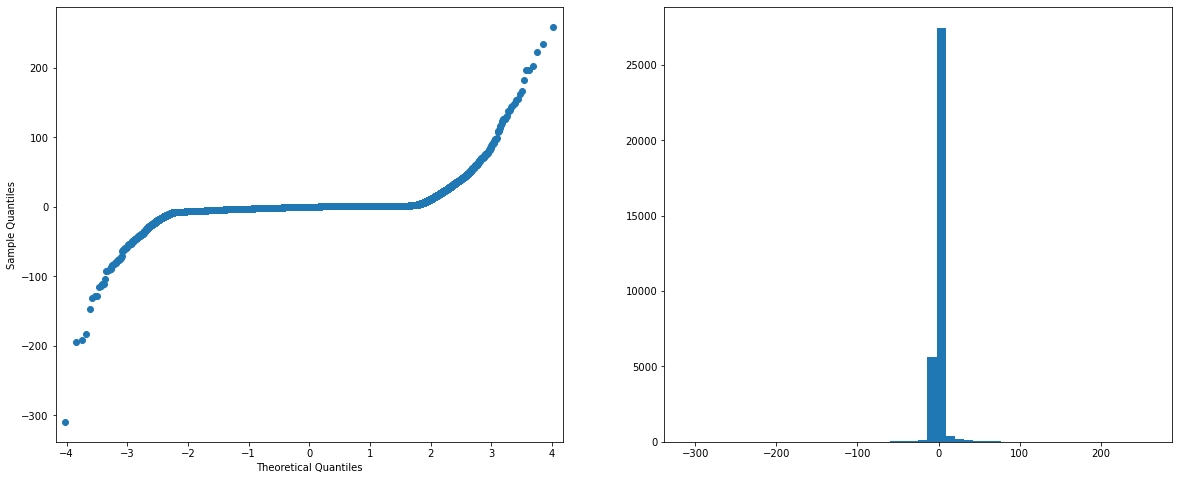

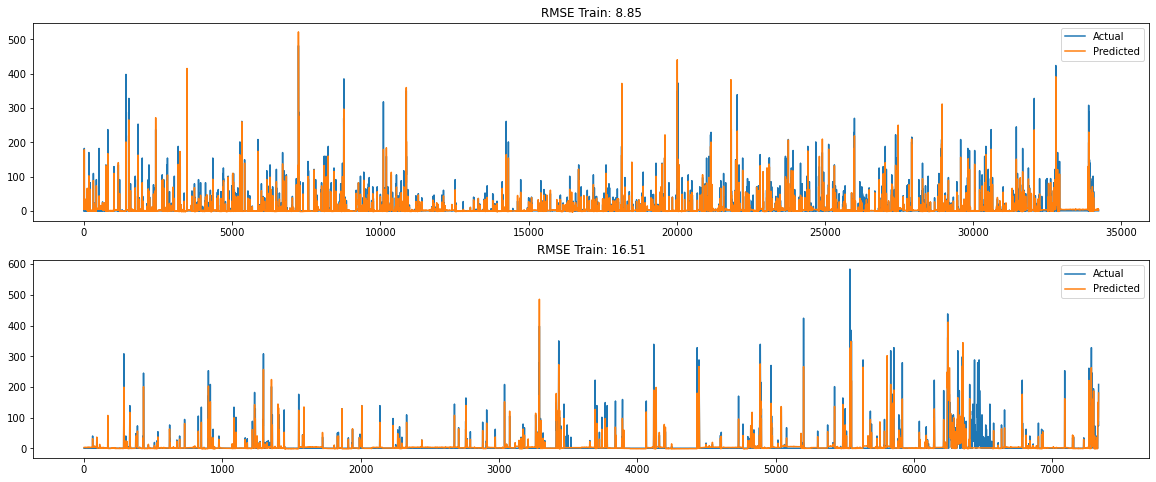

In [24]:
def plot_diagnoistics(trained_model, X_train, Y_train, X_test, Y_test):

    fig = plt.figure(figsize=[20, 8])
    ax = fig.add_subplot(1, 2, 1)
    f = sm.qqplot(trained_model.resid, ax=ax)
    ax = fig.add_subplot(1, 2, 2)
    ax.hist(trained_model.resid, 50)

    Y_train_pred = trained_model.predict(X_train)
    Y_test_pred = trained_model.predict(X_test)
    rmse_train = np.sqrt(np.mean((Y_train_pred - Y_train)**2))
    rmse_test = np.sqrt(np.mean((Y_test_pred - Y_test)**2))

    fig = plt.figure(figsize=[20, 8])
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(np.arange(len(Y_train_pred)), Y_train, label='Actual')
    ax.plot(np.arange(len(Y_train_pred)), Y_train_pred, label='Predicted')
    ax.set_title('RMSE Train: {:.2f}'.format(rmse_train))
    ax.legend()
    
    ax = fig.add_subplot(2, 1, 2)
    ax.plot(np.arange(len(Y_test_pred)), Y_test, label='Actual')
    ax.plot(np.arange(len(Y_test_pred)), Y_test_pred, label='Predicted')
    ax.set_title('RMSE Train: {:.2f}'.format(rmse_test))
    ax.legend()
    
plot_diagnoistics(model, X_train, y_train, X_test, y_test)

In [25]:
# rmse_model_train = np.sqrt(np.mean(((pred_train*y_sigma + y_mu) - (y_train * y_sigma + y_mu))**2))
# rmse_model_val = np.sqrt(np.mean(((pred_val*y_sigma + y_mu) - (y_val * y_sigma + y_mu))**2))

# print('Model 1, Training Data RMSE: %f\nModel 1, Testing Data RMSE: %f' % (rmse_model_train, rmse_model_val))

### R2 Score

In [26]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print('Linear Model\nTraining Data R2 Score: %f\nTesting Data R2 Score: %f' % (r2_train, r2_test))

Linear Model
Training Data R2 Score: 0.748912
Testing Data R2 Score: 0.747239


### Try Polynomial

In [27]:
poly_transform = PolynomialFeatures(6)
X_poly = poly_transform.fit_transform(X)
print(X_poly.shape)
X_train_poly = X_poly[0:training_samples, :]
X_val_poly = X_poly[training_samples:(training_samples + validation_samples), :]
X_test_poly = X_poly[(training_samples + validation_samples):, :]
print(X_train_poly.shape)
print(X_val_poly.shape)
print(X_test_poly.shape)

(48902, 28)
(34231, 28)
(7335, 28)
(7336, 28)


In [28]:
model_poly = sm.OLS(y_train, X_train_poly)
model_poly = model_poly.fit()
print(model_poly.summary())

                                OLS Regression Results                               
Dep. Variable:     Actiwatch activity counts   R-squared:                       0.761
Model:                                   OLS   Adj. R-squared:                  0.761
Method:                        Least Squares   F-statistic:                 1.560e+04
Date:                       Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                               19:34:08   Log-Likelihood:            -1.2233e+05
No. Observations:                      34231   AIC:                         2.447e+05
Df Residuals:                          34223   BIC:                         2.447e+05
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

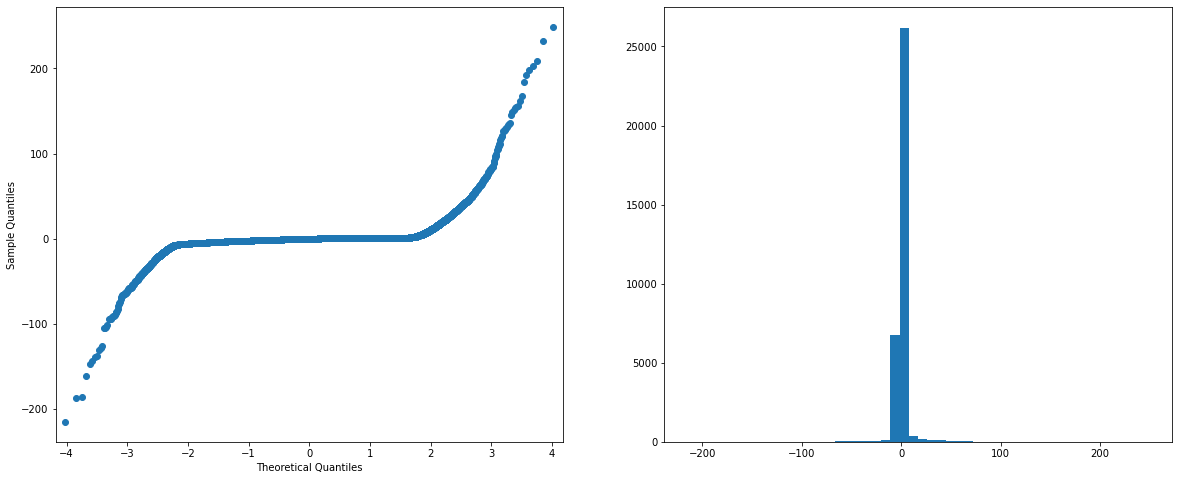

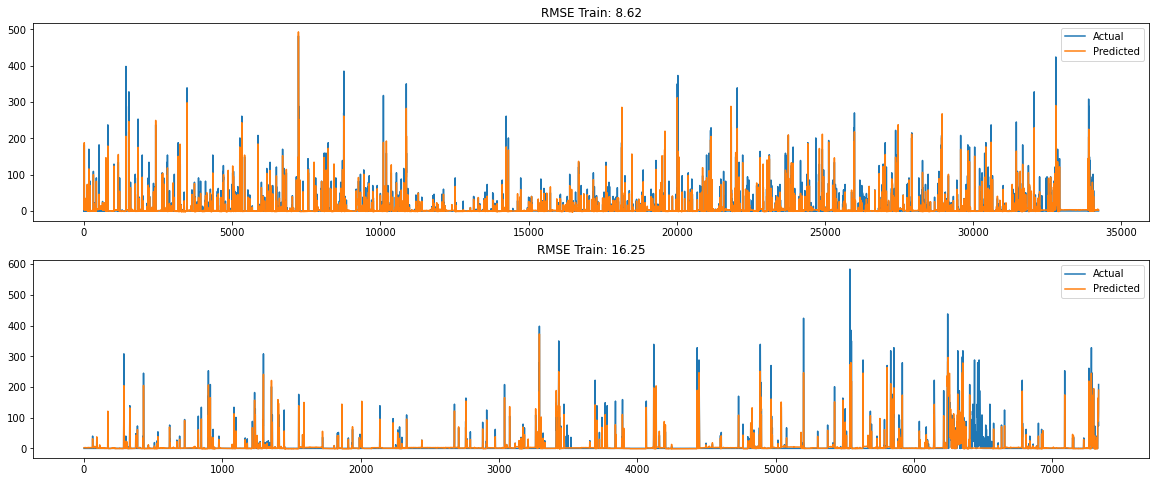

In [29]:
plot_diagnoistics(model_poly, X_train_poly, y_train, X_test_poly, y_test)

In [30]:
r2_poly_train = r2_score(y_train, model_poly.predict(X_train_poly))
r2_poly_test = r2_score(y_test, model_poly.predict(X_test_poly))

print('Poly Model\nTraining Data R2 Score: %f\nTesting Data R2 Score: %f' % (r2_poly_train, r2_poly_test))

Poly Model
Training Data R2 Score: 0.761362
Testing Data R2 Score: 0.755359


In [31]:
Predicted_Apple_Activity_Count = model_poly.predict(X_poly)
#Round all the numbers
Predicted_Apple_Activity_Count = list(map(round, Predicted_Apple_Activity_Count))

# Set all negative values to 0 using list comprehension
Predicted_Apple_Activity_Count = [num if num >= 0 else 0 for num in Predicted_Apple_Activity_Count]

# Count the number of negative values using list comprehension
count_negative = len([num for num in Predicted_Apple_Activity_Count if num < 0])

print("Number of negative values in the list:", count_negative)
print(len(Predicted_Apple_Activity_Count))


Number of negative values in the list: 0
48902


### Set Everything Before and after the first 5 minutes of slepp to wake.

# Sleep Wake Classification

In [32]:
new_data = data

In [33]:
new_data['Apple active counts'] = Predicted_Apple_Activity_Count
new_data.head(15)

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,Apple active counts
0,01/01/2000 01:20:45,0.0,1.0,0.007234,4
1,01/01/2000 01:21:00,24.0,1.0,0.030109,32
2,01/01/2000 01:21:15,3.0,1.0,0.008785,6
3,01/01/2000 01:21:30,0.0,1.0,0.007893,5
4,01/01/2000 01:21:45,3.0,1.0,0.007761,5
5,01/01/2000 01:22:00,0.0,1.0,0.006469,4
6,01/01/2000 01:22:15,0.0,1.0,0.005791,3
7,01/01/2000 01:22:30,0.0,1.0,0.017378,16
8,01/01/2000 01:22:45,182.0,1.0,0.159258,188
9,01/01/2000 01:23:00,164.0,1.0,0.088535,111


In [34]:
new_data.shape

(48902, 5)

In [35]:
new_data

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,Apple active counts
0,01/01/2000 01:20:45,0.0,1.0,0.007234,4
1,01/01/2000 01:21:00,24.0,1.0,0.030109,32
2,01/01/2000 01:21:15,3.0,1.0,0.008785,6
3,01/01/2000 01:21:30,0.0,1.0,0.007893,5
4,01/01/2000 01:21:45,3.0,1.0,0.007761,5
...,...,...,...,...,...
48897,28/01/2000 08:56:30,113.0,1.0,0.071673,88
48898,28/01/2000 08:56:45,79.0,1.0,0.072491,90
48899,28/01/2000 08:57:00,88.0,1.0,0.079414,99
48900,28/01/2000 08:57:15,73.0,1.0,0.093463,117


In [56]:
def totalCounts(ae):
    total = 0

    # Calculate the summation from i = -8 to i = -5
    for i in range(-8, -4):
        total += 0.04 * ae[i]

    # Calculate the summation from i = -4 to i = -1
    for i in range(-4, 0):
        total += 0.2 * ae[i]

    # Add the constant term 4*ae
    total += 4 * ae[0]

    # Calculate the summation from i = 1 to i = 4
    for i in range(1, 5):
        total += 0.2 * ae[i]

    # Calculate the summation from i = 5 to i = 8
    for i in range(5, 9):
        total += 0.04 * ae[i]

    return total

# Sample usage
ae = [1,1,1,1,1,1,1,180,161,5,4,3,3,2,1,1]  # sample values for illustration
print(totalCounts(ae))
print(ae)

26.839999999999996
[1, 1, 1, 1, 1, 1, 1, 180, 161, 5, 4, 3, 3, 2, 1, 1]


In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  48902 non-null  object 
 1   Actiwatch activity counts  48902 non-null  float64
 2   Actiware classification    48902 non-null  float64
 3   Apple Watch ENMO           48902 non-null  float64
 4   Apple active counts        48902 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [57]:
def calculate_total_counts(df):
    for index, value in enumerate(df['Actiwatch activity counts']):
        if index >= 13 and index <= len(df['Actiwatch activity counts']) - 13:
            ae = list(df['Actiwatch activity counts'][index - 8:index + 9])
            df.at[index, 'Total Counts'] = totalCounts(ae)
        else:
            df.at[index, 'Total Counts'] = 100
    return df

calculate_total_counts(new_data)

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,Apple active counts,Total Counts,Apple Classification
0,01/01/2000 01:20:45,0.0,1.0,0.007234,4,100.0,1
1,01/01/2000 01:21:00,24.0,1.0,0.030109,32,100.0,1
2,01/01/2000 01:21:15,3.0,1.0,0.008785,6,100.0,1
3,01/01/2000 01:21:30,0.0,1.0,0.007893,5,100.0,1
4,01/01/2000 01:21:45,3.0,1.0,0.007761,5,100.0,1
...,...,...,...,...,...,...,...
48897,28/01/2000 08:56:30,113.0,1.0,0.071673,88,100.0,1
48898,28/01/2000 08:56:45,79.0,1.0,0.072491,90,100.0,1
48899,28/01/2000 08:57:00,88.0,1.0,0.079414,99,100.0,1
48900,28/01/2000 08:57:15,73.0,1.0,0.093463,117,100.0,1


In [58]:
new_data['Actiware classification'].value_counts()

0.0    45023
1.0     3879
Name: Actiware classification, dtype: int64

In [59]:
new_data.head(40)

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,Apple active counts,Total Counts,Apple Classification
0,01/01/2000 01:20:45,0.0,1.0,0.007234,4,100.00,1
1,01/01/2000 01:21:00,24.0,1.0,0.030109,32,100.00,1
2,01/01/2000 01:21:15,3.0,1.0,0.008785,6,100.00,1
3,01/01/2000 01:21:30,0.0,1.0,0.007893,5,100.00,1
4,01/01/2000 01:21:45,3.0,1.0,0.007761,5,100.00,1
5,01/01/2000 01:22:00,0.0,1.0,0.006469,4,100.00,1
6,01/01/2000 01:22:15,0.0,1.0,0.005791,3,100.00,1
7,01/01/2000 01:22:30,0.0,1.0,0.017378,16,100.00,1
8,01/01/2000 01:22:45,182.0,1.0,0.159258,188,100.00,1
9,01/01/2000 01:23:00,164.0,1.0,0.088535,111,100.00,1


In [60]:
# Set up parameters
threshold = 20  # You can try different thresholds (e.g., 20 or 40)
window_size = 15  # 15-second epoch

# Reset the index of the DataFrame 'new_data'
new_data.reset_index(drop=True, inplace=True)

# Define the classification function
def classify_epoch(total_counts, threshold):
    if total_counts <= threshold:
        return 0  # Sleep
    else:
        return 1  # Wake

# Apply classification
new_data['Apple Classification'] = new_data['Total Counts'].apply(lambda x: classify_epoch(x, threshold))

In [61]:
# Evaluate the results using ground truth (Actiware classification)
accuracy = (new_data['Apple Classification'] == new_data['Actiware classification']).mean()
print(f'Accuracy: {accuracy:.4f}')

# # Save the results to a new CSV file
# new_data.to_csv('results.csv', index=False)

Accuracy: 0.8702


              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     45023
         1.0       0.31      0.51      0.39      3879

    accuracy                           0.87     48902
   macro avg       0.63      0.71      0.66     48902
weighted avg       0.90      0.87      0.88     48902



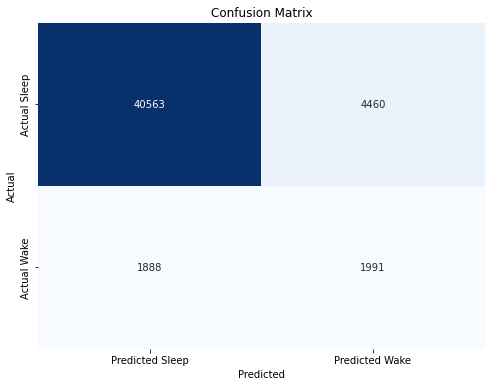

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

report = classification_report(new_data['Actiware classification'], new_data['Apple Classification'])

print(report)

conf_matrix = confusion_matrix(new_data['Actiware classification'], new_data['Apple Classification'])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Sleep', 'Predicted Wake'],
            yticklabels=['Actual Sleep', 'Actual Wake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
new_data['Apple Classification'].value_counts()

0    48862
1       40
Name: Apple Classification, dtype: int64